# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download list to file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Note! Ad blockers will cause issues

## Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'dogs'
file = 'urls_dogs.txt'

In [5]:
folder = 'cats'
file = 'urls_cats.txt'

In [8]:
folder = 'chickens'
file = 'urls_chickens.txt'

In [12]:
folder = 'babies'
file = 'urls_babies.txt'

You will need to run this line once per each category.

In [13]:
path = Path('data/cdcb')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

## Download images

In [16]:
classes = ['cats','dogs','chickens', 'babies']

In [15]:
download_images(path/file, dest, max_pics=200)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

cats


cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000027.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000044.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000179.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000186.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000078.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000063.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000064.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000021.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000056.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000013.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/cats/00000065.jpg'
dogs


cannot identify image file '/notebooks/fastaiprojects/data/cdcb/dogs/00000081.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/dogs/00000051.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/dogs/00000076.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/dogs/00000056.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/dogs/00000039.jpg'
chickens


cannot identify image file '/notebooks/fastaiprojects/data/cdcb/chickens/00000052.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/chickens/00000139.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/chickens/00000030.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/chickens/00000128.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/chickens/00000152.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/chickens/00000093.jpg'
babies


cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000199.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000007.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000152.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000148.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000123.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000060.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000190.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000092.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000089.jpg'
cannot identify image file '/notebooks/fastaiprojects/data/cdcb/babies/00000107.jpg'


### View data

In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['chickens', 'cats', 'dogs', 'babies']

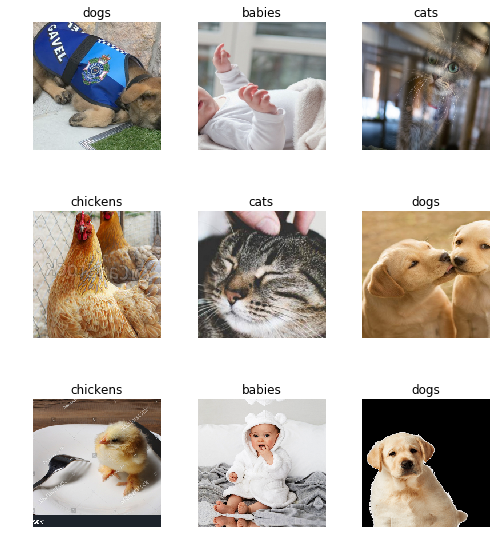

In [20]:
data.show_batch(rows=3, figsize=(7,8))